In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to C:\Users\Nivarthi
[nltk_data]     Vishwas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...


In [8]:
df = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx',dtype=str)
df

Reviews Sentiment
0      When I first tuned in on this morning news, I ...       neg
1      Mere thoughts of "Going Overboard" (aka "Babes...       neg
2      Why does this movie fall WELL below standards?...       neg
3      Wow and I thought that any Steven Segal movie ...       neg
4      The story is seen before, but that does'n matt...       neg
...                                                  ...       ...
24995  Everyone plays their part pretty well in this ...       pos
24996  It happened with Assault on Prescient 13 in 20...       neg
24997  My God. This movie was awful. I can't complain...       neg
24998  When I first popped in Happy Birthday to Me, I...       neg
24999  So why does this show suck? Unfortunately, tha...       neg

[25000 rows x 2 columns]

In [9]:
df.shape

(25000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

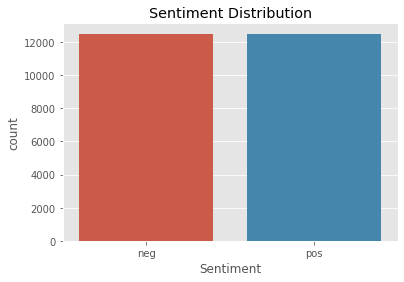

In [12]:
sns.countplot(x='Sentiment',data=df)
plt.title('Sentiment Distribution')

In [13]:
for i in range(5):
    print("Review:",[i])
    print(df["Reviews"].iloc[i],"\n")
    print("Sentiment: ",df["Sentiment"].iloc[i],"\n")

Review: [0]
When I first tuned in on this morning news, I thought, "wow, finally, some entertainment." It was slightly amusing for a week or so... But we have to face it, these news reporters (if one can even call them that) have WAY TOO MUCH "playing around" time.<br /><br />At first, I thought Jillian was a breathe of fresh air. But seriously, this woman has got not the least bit of journalist in her. She is very unprofessional. She keeps on interrupting Steve when he starts informing the viewers about a certain news report. It's just really become annoying to the point that I can't watch it anymore.<br /><br />Jillian is NOT a good journalist. Hell, she's more of a celebrity who loves being a celebrity. Hence, she instantly transforms into a celebrity around celebrities whom she's supposed to be interviewing. She's not very professional and quite possibly perceives her relationship with celebrities more important than being a rightfully insatiable journalist- and that's all I can sa

In [14]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [15]:
df['word_count'] = df["Reviews"].apply(no_of_words)

In [16]:
df.head()

Reviews Sentiment  word_count
0  When I first tuned in on this morning news, I ...       neg         297
1  Mere thoughts of "Going Overboard" (aka "Babes...       neg          59
2  Why does this movie fall WELL below standards?...       neg         239
3  Wow and I thought that any Steven Segal movie ...       neg         149
4  The story is seen before, but that does'n matt...       neg         216

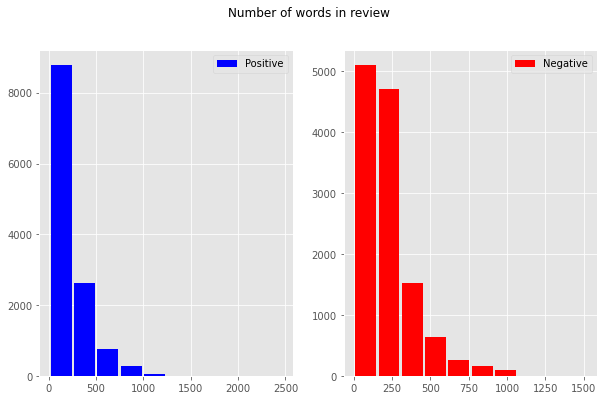

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["Sentiment"]=="pos"]["word_count"],label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df["Sentiment"]=="neg"]["word_count"],label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

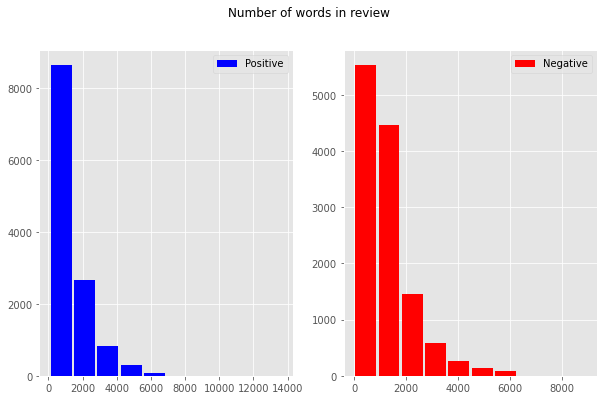

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["Sentiment"]=="pos"]["Reviews"].str.len(),label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df["Sentiment"]=="neg"]["Reviews"].str.len(),label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [21]:
df.Sentiment.replace("pos",1,inplace=True)
df.Sentiment.replace("neg",2,inplace=True)

In [22]:
df.head()

Reviews  Sentiment  word_count
0  When I first tuned in on this morning news, I ...          2         297
1  Mere thoughts of "Going Overboard" (aka "Babes...          2          59
2  Why does this movie fall WELL below standards?...          2         239
3  Wow and I thought that any Steven Segal movie ...          2         149
4  The story is seen before, but that does'n matt...          2         216

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Nivarthi
[nltk_data]     Vishwas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
def data_processing(text):
    text = text.lower()
    text=re.sub('<br />','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [42]:
df.Reviews = df["Reviews"].apply(data_processing)

C:\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  0


In [44]:
df = df.drop_duplicates("Reviews")

In [45]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [46]:
df.Reviews = df["Reviews"].apply(lambda x: stemming(x))

In [47]:
df['word_count'] = df["Reviews"].apply(no_of_words)
df.head()

Reviews  Sentiment  word_count
0  first tuned morning news thought wow finally e...          2         166
1  mere thoughts going overboard aka babes ahoy m...          2          34
2  movie fall well standards ultimately answer li...          2         132
3  wow thought steven segal movie bad every time ...          2          79
4  story seen matter figure make proper storyboar...          2          94

In [48]:
pos_reviews = df[df.Sentiment == 1]
pos_reviews.head()

Reviews  Sentiment  word_count
7   think still best routine others like rocks bri...          1          67
8   far parody films go worth time energy recent r...          1          92
10  panic streets fairly unknown little movie dire...          1         135
11  lose friends alienate people based tiger woods...          1         175
12  saw film last night cable extraordinary love u...          1          77

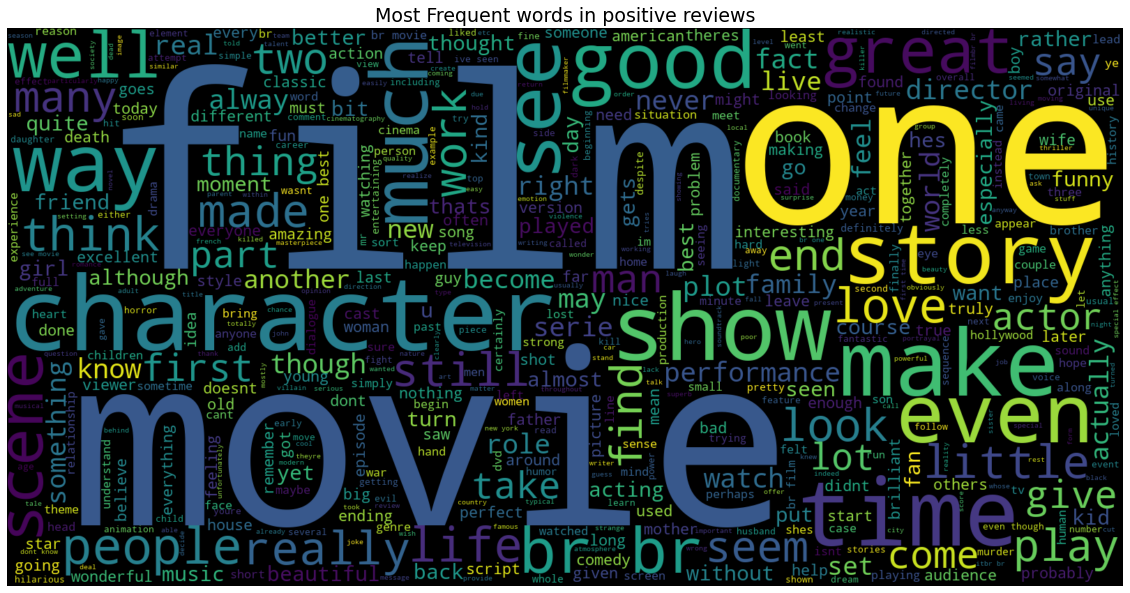

In [49]:
text = ' '.join([word for word in pos_reviews["Reviews"]])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in positive reviews',fontsize=19)
plt.show()

In [50]:
from collections import Counter
count = Counter()
for text in pos_reviews["Reviews"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('br', 27505),
 ('film', 19568),
 ('movie', 18117),
 ('one', 13049),
 ('like', 8715),
 ('good', 7386),
 ('story', 6482),
 ('great', 6284),
 ('time', 5991),
 ('see', 5835),
 ('well', 5565),
 ('also', 5503),
 ('really', 5441),
 ('would', 5283),
 ('even', 4884)]

In [51]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

word  count
0     br  27505
1   film  19568
2  movie  18117
3    one  13049
4   like   8715

In [52]:
px.bar(pos_words,x='count',y='word',title="Common words in positive reviews")

In [53]:
neg_reviews = df[df.Sentiment == 2]
neg_reviews.head()

Reviews  Sentiment  word_count
0  first tuned morning news thought wow finally e...          2         166
1  mere thoughts going overboard aka babes ahoy m...          2          34
2  movie fall well standards ultimately answer li...          2         132
3  wow thought steven segal movie bad every time ...          2          79
4  story seen matter figure make proper storyboar...          2          94

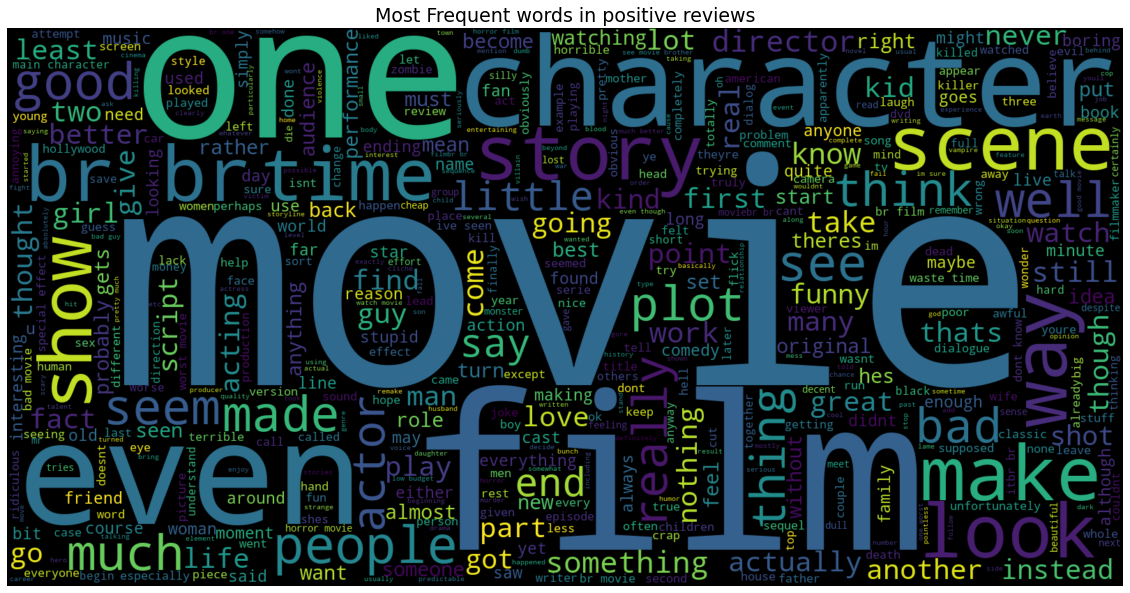

In [54]:
text = ' '.join([word for word in neg_reviews["Reviews"]])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in positive reviews',fontsize=19)
plt.show()

In [55]:
from collections import Counter
count = Counter()
for text in neg_reviews["Reviews"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('br', 29480),
 ('movie', 23552),
 ('film', 17790),
 ('one', 12373),
 ('like', 10867),
 ('even', 7579),
 ('good', 7133),
 ('bad', 7048),
 ('would', 6814),
 ('really', 6183),
 ('time', 5729),
 ('see', 5347),
 ('dont', 5140),
 ('get', 4960),
 ('much', 4950)]

In [56]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

word  count
0     br  29480
1  movie  23552
2   film  17790
3    one  12373
4   like  10867

In [57]:
px.bar(neg_words,x='count',y='word',title="Common words in negative reviews")

In [58]:
X=df["Reviews"]
Y=df["Sentiment"]

In [59]:
vect = TfidfVectorizer()
X=vect.fit_transform(df["Reviews"])

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [64]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.04%


In [65]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[2216  240]
 [ 306 2219]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      2456
           2       0.90      0.88      0.89      2525

    accuracy                           0.89      4981
   macro avg       0.89      0.89      0.89      4981
weighted avg       0.89      0.89      0.89      4981



In [66]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred,y_test)
print("Test Accuracy: {:.2f}%".format(mnb_acc*100))

Test Accuracy: 87.15%


In [67]:
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test,mnb_pred))

[[2109  347]
 [ 293 2232]]


              precision    recall  f1-score   support

           1       0.88      0.86      0.87      2456
           2       0.87      0.88      0.87      2525

    accuracy                           0.87      4981
   macro avg       0.87      0.87      0.87      4981
weighted avg       0.87      0.87      0.87      4981



In [68]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 89.52%


In [69]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[2217  239]
 [ 283 2242]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      2456
           2       0.90      0.89      0.90      2525

    accuracy                           0.90      4981
   macro avg       0.90      0.90      0.90      4981
weighted avg       0.90      0.90      0.90      4981



In [95]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [76]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [77]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [78]:
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred,y_test)
print("Test Accuracy: {:.2f}%".format(rf_acc*100))

Test Accuracy: 76.55%


In [ ]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(x_train,y_train)